In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#|hide
from nbdev import *
from fastcore.test import *
from fastcore.utils import *

# Display images

In [3]:
#| warning: false
from fastai.vision.all import *

/Users/tmartins/.local/share/virtualenvs/learntorank-ALIDm6Gx/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Search image URLs

In [4]:
!pip install -Uq duckduckgo_search

In [5]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [6]:
urls = search_images("cat", max_images=10)

Searching for 'cat'


In [7]:
print(f"Number of URLs: {len(urls)}")
print(urls[0])

Number of URLs: 10
https://wallup.net/wp-content/uploads/2019/09/1667-beautiful-gray-cat.jpg


## Download images to a temp folder

In [8]:
import tempfile

temp_folder = tempfile.TemporaryDirectory()
temp_path = Path(temp_folder.name)
download_images(dest=temp_path, urls=urls)

In [9]:
print(f"Number of images: {len(temp_path.ls())}")
print(f"Sample: {temp_path.ls()[0]}")

Number of images: 8
Sample: /var/folders/6r/7z6k6kj96wvf3qhq_xqpzy380000gn/T/tmpguam1f7p/4e787d39-7f6a-4c26-be66-49c40a331d7b.jpg


## Display images on a grid

In [10]:
image_files = temp_path.ls()[0:6]
captions = [f"Cat image {x}" for x in range(len(image_files))]

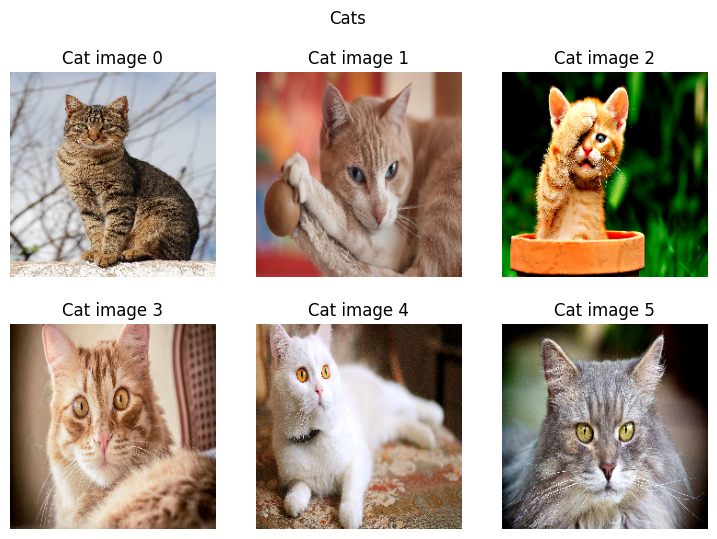

In [11]:
show_images(
    ims=[
        PILImage.create(image_file).reshape(224,224) 
        for image_file in temp_path.ls()
    ],
    titles=captions,
    nrows=2,
    ncols=3,
    suptitle='Cats',  
)

## Cleanup

In [12]:
temp_folder.cleanup()

In [13]:
#|hide
nbdev_export()